# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['timezone'] # ??? use timezone in combination with unix timestamp ???

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | jalalabad
Processing Record 3 of Set 1 | ciudad lazaro cardenas
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | akureyri
Processing Record 6 of Set 1 | port blair
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | antofagasta
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | armacao de buzios
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | waingapu
Processing Record 16 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | mokhsogollokh
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1 | arkhan

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,8.81,58,40,11.83,AR,-10800
1,jalalabad,34.4265,70.4515,20.94,38,43,0.16,AF,16200
2,ciudad lazaro cardenas,17.9583,-102.2000,29.74,73,98,1.68,MX,-21600
3,lompoc,34.6391,-120.4579,17.14,73,0,5.36,US,-28800
4,akureyri,65.6835,-18.0878,-5.04,86,0,0.00,IS,0


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,8.81,58,40,11.83,AR,-10800
1,jalalabad,34.4265,70.4515,20.94,38,43,0.16,AF,16200
2,ciudad lazaro cardenas,17.9583,-102.2000,29.74,73,98,1.68,MX,-21600
3,lompoc,34.6391,-120.4579,17.14,73,0,5.36,US,-28800
4,akureyri,65.6835,-18.0878,-5.04,86,0,0.00,IS,0


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

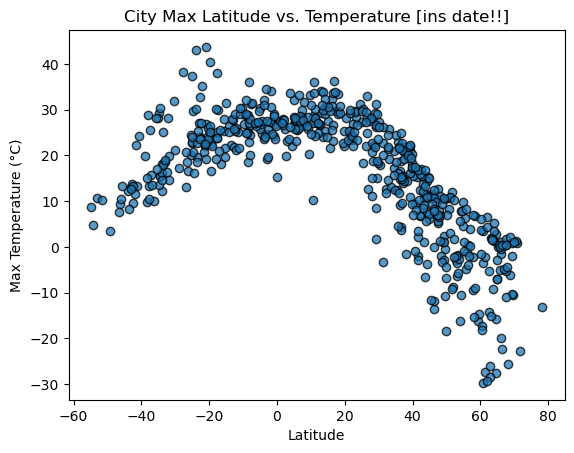

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature [ins date!!]')
plt.ylabel('Max Temperature (°C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

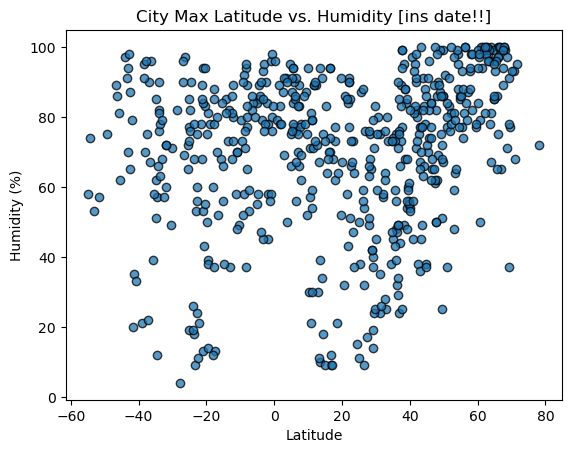

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity [ins date!!]')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

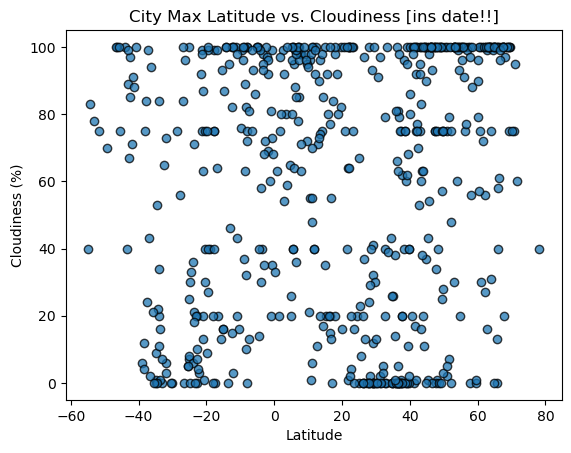

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness [ins date!!]')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

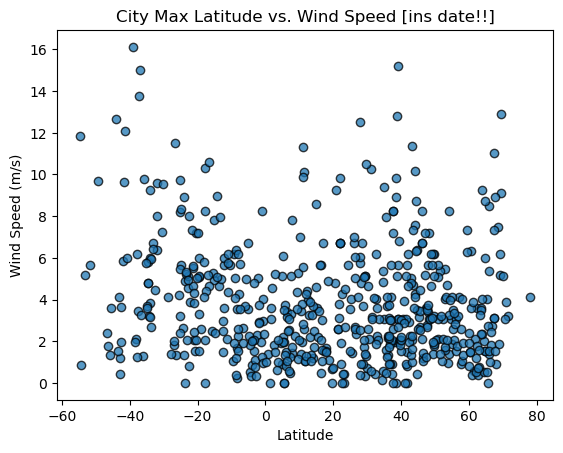

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed [ins date!!]')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def calculate_linereg(x, y, annotate_x_pos, annotate_y_pos):
    
    # Define axis data
    x_values = x
    y_values = y
    
    # Calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(annotate_x_pos,annotate_y_pos),fontsize=15,color="red") # bestpos?
    plt.xlabel('placeholder')
    plt.ylabel('placeholder')
    plt.show()
    return rvalue


In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jalalabad,34.4265,70.4515,20.94,38,43,0.16,AF,16200
2,ciudad lazaro cardenas,17.9583,-102.2000,29.74,73,98,1.68,MX,-21600
3,lompoc,34.6391,-120.4579,17.14,73,0,5.36,US,-28800
4,akureyri,65.6835,-18.0878,-5.04,86,0,0.00,IS,0
5,port blair,11.6667,92.7500,27.02,89,40,1.03,IN,19800


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.800,-68.3000,8.81,58,40,11.83,AR,-10800
7,adamstown,-25.066,-130.1015,22.59,85,100,9.75,PN,-28800
8,punta arenas,-53.150,-70.9167,10.62,53,78,5.17,CL,-10800
9,antofagasta,-23.650,-70.4000,19.66,68,21,4.88,CL,-10800
10,margaret river,-33.950,115.0667,12.30,90,34,3.83,AU,28800


###  Temperature vs. Latitude Linear Regression Plot

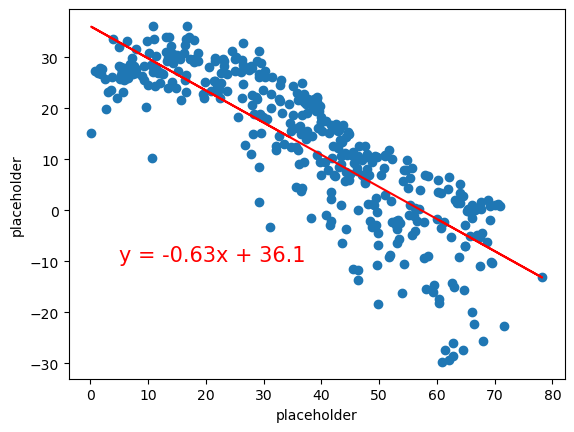

-0.8428295057207033

In [84]:
# Linear regression on Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Max Temp'], annotate_x_pos=5, annotate_y_pos=-10)

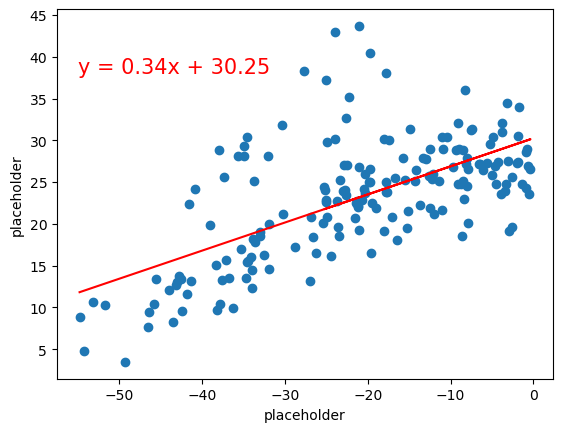

0.6359788419970123

In [85]:
# Linear regression on Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Max Temp'], annotate_x_pos=-55, annotate_y_pos=38)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

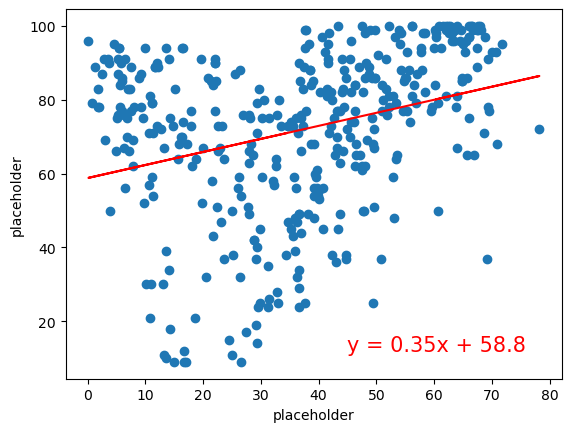

0.3064893219212214

In [86]:
# Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Humidity'], annotate_x_pos=45, annotate_y_pos=12)

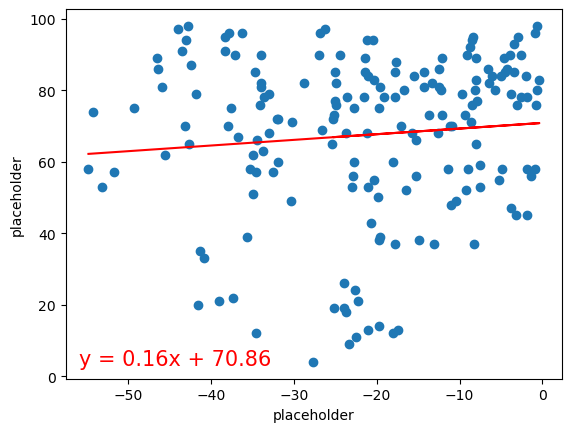

0.09555527581034502

In [87]:
# Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Humidity'], annotate_x_pos=-56, annotate_y_pos=3)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

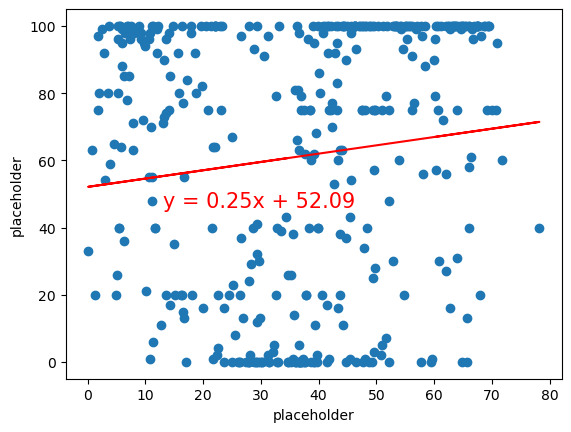

0.1226121838128338

In [88]:
# Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Cloudiness'], annotate_x_pos=13, annotate_y_pos=46)

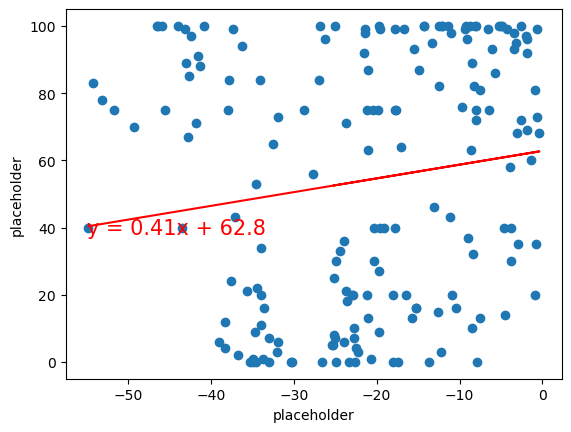

0.14927439974886844

In [89]:
# Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Cloudiness'], annotate_x_pos=-55, annotate_y_pos=38)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

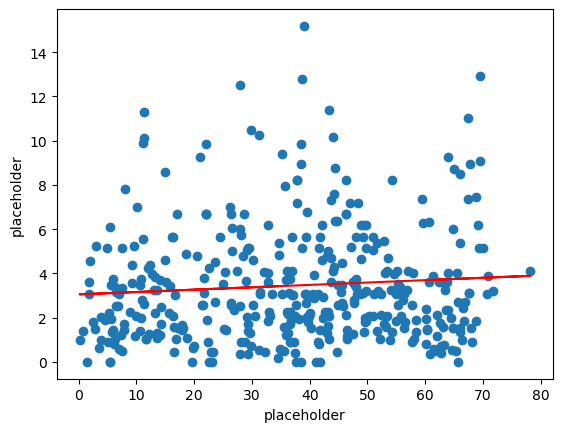

0.07994075244490427

In [90]:
# Northern Hemisphere
calculate_linereg(x=northern_hemi_df['Lat'], y=northern_hemi_df['Wind Speed'], annotate_x_pos=5, annotate_y_pos=-10)

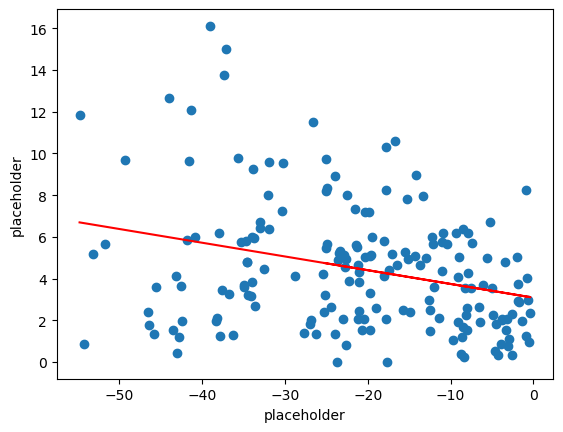

-0.2980210167879707

In [91]:
# Southern Hemisphere
calculate_linereg(x=southern_hemi_df['Lat'], y=southern_hemi_df['Wind Speed'], annotate_x_pos=-55, annotate_y_pos=38)


**Discussion about the linear relationship:** YOUR RESPONSE HERE